In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"/Users/zxf/数据分析-数据集/Womens Clothing E-Commerce Reviews .csv")

这是一个围绕着客户撰写的评论的女装电子商务数据集。它的九个支持功能为通过多个维度解析文本提供了一个绝佳的环境。由于这是真实的商业数据，因此已被匿名化，并且在评论文本和正文中对公司的引用已替换为“零售商”。

数据集简介：
该数据集包括23486行和10个特征变量。每行对应一个客户评论，并包含以下变量：

服装ID：整数分类变量，指的是要查看的特定作品。

年龄：评论者年龄的正整数变量。

标题：评论标题的字符串变量。

评论文本：评论正文的字符串变量。

评分：客户授予的产品评分的正序整数变量，从1最差，到5最佳。

推荐的IND：二进制变量，说明客户在推荐1的地方推荐产品的地方，不推荐0的地方。

积极的反馈计数：积极的整数，记录发现该评论为积极的其他客户的数量。

部门名称：产品高级部门的分类名称。

部门名称：产品部门名称的分类名称。

类名称：产品类名称的分类名称。

In [130]:
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [4]:
#检查”Age“字段是否存在缺失值
any(df.Age.isnull())

False

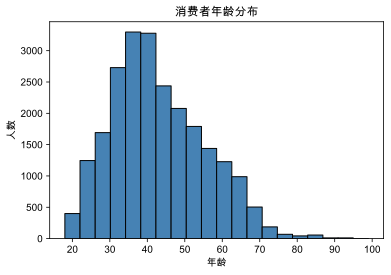

In [5]:
import matplotlib.pyplot as plt
##绘制直方图
plt.rcParams['font.sans-serif']=['Arial Unicode MS']#用来正常显示中文标签
%config InlineBackend.figure_format='svg'
plt.hist(
        x=df.Age,
        bins=20,
        color="steelblue",
        edgecolor="black"
    )
#添加x轴和y轴标签
plt.xlabel("年龄")
plt.ylabel("人数")

#添加标题
plt.title("消费者年龄分布")

#显示图形
plt.show()

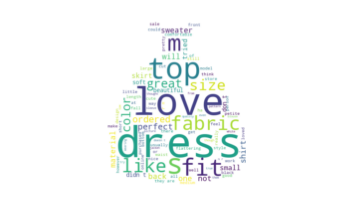

In [140]:
# import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import cv2
# 读取内容
text = df['Review Text'].tolist()
# text = re.findall('[\u4e00-\u9fa5]+', text, re.S)# 文本预处理去除一些无用的字符   只提取出中文出来
text = re.findall(r'\b[a-zA-Z]+\b', str(text), re.S)# 文本预处理去除一些无用的字符   只提取出英文出来
text = ' '.join(text)
# 读取图片
im = cv2.imread('/Users/zxf/Downloads/dress.jpg')
# 准备禁用词，需要为set类型
stop_words=set(["wear","look","it","the","that","i","am","and","a","is","this","but","in","on","so","wa","with","when","was","just","got","as","because","also","me","to","be","had","would","you","for","bought","have","if","can","which"])
# 设置参数，创建WordCloud对象
wc = WordCloud(
    max_words=100,
    min_font_size=6,
    background_color='white',    # 设置背景颜色为白色
    stopwords=stop_words,        # 设置禁用词，在生成的词云中不会出现set集合中的词
    mask=im
)
wordcloud = wc.generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file("/Users/zxf/数据分析-数据集/服装评价词云.png") # 保存词云文件

dress>top skirt shirt sweater    love like  fit great perfect   fabric>size>color    m s

In [137]:
#选取消费者不推荐的数据
df_0=df.loc[(df["Class Name"]=="Trend")&(df["Recommended IND"]==0),:]
print(df_0.info())
df_0.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 965 to 23020
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               31 non-null     int64 
 1   Clothing ID              31 non-null     int64 
 2   Age                      31 non-null     int64 
 3   Title                    26 non-null     object
 4   Review Text              30 non-null     object
 5   Rating                   31 non-null     int64 
 6   Recommended IND          31 non-null     int64 
 7   Positive Feedback Count  31 non-null     int64 
 8   Division Name            31 non-null     object
 9   Department Name          31 non-null     object
 10  Class Name               31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.9+ KB
None


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
965,965,1140,36,NaN,This skirt is not what i was expecting at all....,3,0,3,General Petite,Trend,Trend
2874,2874,573,43,Odd cut,I order from retailer regularly and am pretty ...,3,0,17,General Petite,Trend,Trend
2876,2876,573,34,Ok,I was so excited to receive this in the mail a...,3,0,4,General Petite,Trend,Trend


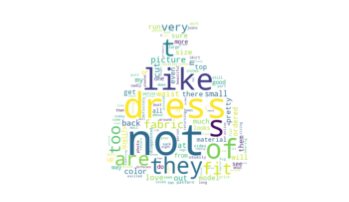

In [139]:
# 读取内容
text_0 = df_0['Review Text'].tolist()
text_0 = re.findall(r'\b[a-zA-Z]+\b', str(text_0), re.S)# 文本预处理去除一些无用的字符,只提取出英文出来
text_0 = ' '.join(text_0)
text_0
                                    
# 读取图片
im = cv2.imread('/Users/zxf/Downloads/dress.jpg')
# 准备禁用词，需要为set类型
stop_words=set(["nan","cute","wear","look","it","the","that","i","am","and","a","is","this","but","in","on","so","wa","with","when","was","just","got","as","because","also","me","to","be","had","would","you","for","bought","have","if","can","which"])
# 设置参数，创建WordCloud对象
wc_0 = WordCloud(
    max_words=200,
    min_font_size=6,
    background_color='white',    # 设置背景颜色为白色
    stopwords=stop_words,        # 设置禁用词，在生成的词云中不会出现set集合中的词
    mask=im
)
wordcloud = wc_0.generate(text_0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

In [ ]:
from wordcloud import STOPWORDS #wordcloud自带停用词
print(STOPWORDS)